[View in Colaboratory](https://colab.research.google.com/github/shoaibkhanz/Elonsays/blob/master/california_housing.ipynb)

## Predicting median house value in California

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

In [99]:
os.listdir()

['.config', 'sample_data']

In [0]:
train = pd.read_csv('sample_data/california_housing_train.csv', header = 0)
test  = pd.read_csv('sample_data/california_housing_test.csv', header = 0)

Xtrain = train.loc[:,train.columns != 'median_house_value']
ytrain = train.median_house_value

Xtest = test.loc[:,test.columns != 'median_house_value']
ytest = test.median_house_value

In [101]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 8 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs = -1)

In [103]:
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [104]:
coef_df = pd.DataFrame(lr.coef_,Xtrain.columns, columns = ['coefficients'])
coef_df

,coefficients
longitude,-43139.637258
latitude,-42925.673088
housing_median_age,1150.694932
total_rooms,-8.378251
total_bedrooms,117.648543
population,-38.488772
households,45.436003
median_income,40507.068359


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [106]:
ypred = lr.predict(Xtest)
print('r2 value is ',round(r2_score(ytest, ypred),2))
print('mean_squared_error value is ',round(mean_squared_error(ytest, ypred),2))


r2 value is  0.62
mean_squared_error value is  4867205486.93


### Cross-validation

In [107]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, Xtrain,ytrain, cv = 5)
lr_scores

array([0.52201778, 0.56428342, 0.60260364, 0.39679821, 0.65576199])

In [0]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(lr,Xtrain,ytrain,cv = 7,scoring = 'r2')

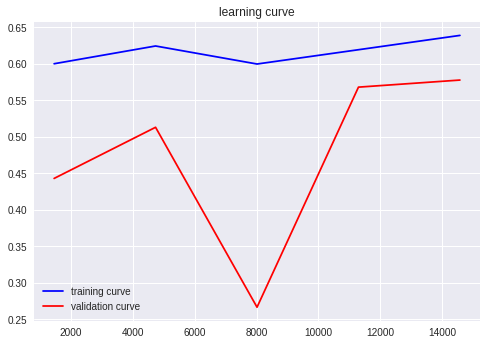

In [109]:
plt.plot(train_sizes, np.median(train_scores,1), label = 'training curve', color = 'blue')
plt.plot(train_sizes,np.median(val_scores,1), label = 'validation curve', color = 'red')
plt.title('learning curve')
plt.xlabel('')
plt.legend(loc = 'best')
plt.show()

In [0]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(Xtrain,ytrain)
ypred = ridge.predict(Xtest)

In [111]:
r2_score(ytest,ypred)

0.6195058474464917

In [112]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(Xtrain,ytrain)
ypred = lasso.predict(Xtest)
r2_score(ytest,ypred)

0.6195057997915545

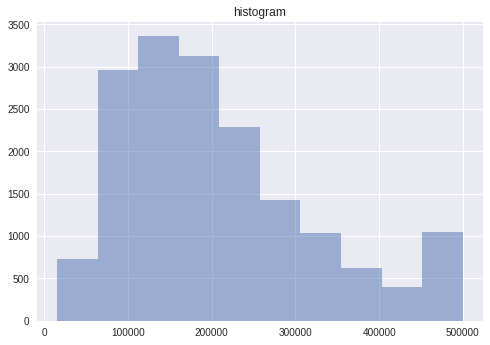

In [116]:
plt.hist(ytrain, label = 'histogram', alpha = 0.5)
plt.title('histogram')
plt.show()